# SHs Expansion and Mesh Generation

* Input: spherical harmonics coefficients
* Output: triangular surface mesh, plots
* Budi Zhao 2020-03

* Ref: *Icosahedron and subdivision code based on Matlab code by Wil O.C. Ward* <a href="https://www.mathworks.com/matlabcentral/fileexchange/50105-icosphere" target="_blank">Link</a>

## Load packages and functions

In [1]:
# packages
import numpy as np
import scipy.io as sio
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

/home/budi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return f(*args, **kwds)


In [2]:
# load functions
from funcs import *
from SHPSG import *

In [3]:
# %load funcs.py
# %%write 

## Create coefficients - create mesh

In [19]:
# create coefficients
Ei,Fi,D2_8,D9_15 = 1,1,0.3,0
coeff = SHPSG(Ei,Fi,D2_8,D9_15)
# generate surface grids
vertices, faces = icosahedron()
for i in range(2): 
    # subdivide surface
    vertices, faces = subdivsurf(faces,vertices)
    # remove duplicate vertices
    vertices, faces = cleanmesh(faces,vertices)

# convert to spherical coordinates
sph_cor = car2sph(vertices)

## SH expansion - export STL

In [20]:
# update vertices by SH expansion
for i in range(3):
    vertices[:,i] = sph2cart(coeff,sph_cor[:,4],sph_cor[:,5])[i]

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]
        
# Write the mesh to file "cube.stl"
cube.save('cube.stl')

/home/budi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


## Plot stl surface

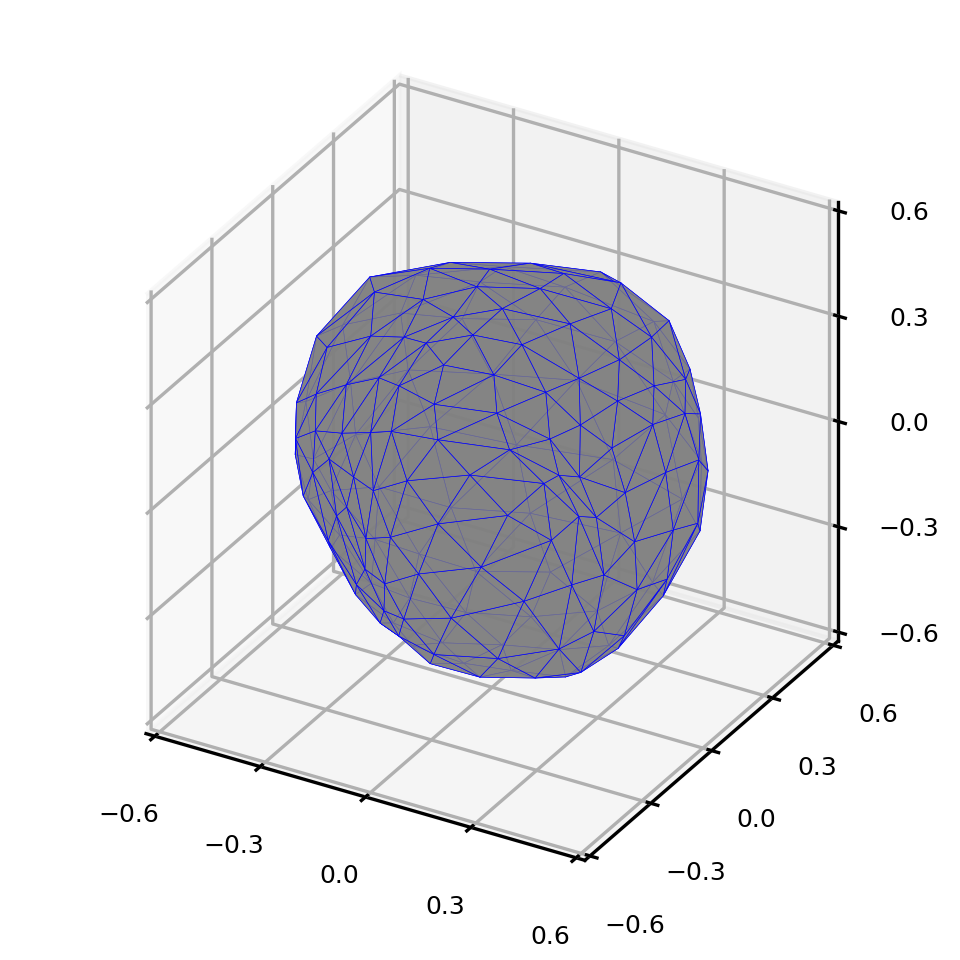

In [21]:
# create a new plot
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = mplot3d.Axes3D(fig, proj_type ='ortho') 
plt.rc('font', size=6) 

# load STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('./cube.stl')
surf = mplot3d.art3d.Poly3DCollection(your_mesh.vectors,linewidth=0.15,facecolors='grey', 
                                      edgecolor = 'b', alpha=.8)
# set axis properties
ax.add_collection3d(surf)

# set scale
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])
ax.set_zlim([-0.6, 0.6])
ax.set_xticks(np.arange(-0.6, 0.601, step=0.3))
ax.set_yticks(np.arange(-0.6, 0.601, step=0.3))
ax.set_zticks(np.arange(-0.6, 0.601, step=0.3))

# Show the plot to the screen
plt.show()

fig.savefig('./par.png',dpi = 300, bbox_inches='tight')